# Question 1)
## Part a)

##### Before any analysis, it should be noted that comparing AOV to a sneaker's price is sort of fallacy. They are not of the same essence. AOV in essence is a measurement of order, and an order may not readily translate to one pair of sneakers. In other words, order amount is a product of two separate parameters namely, 'total_items' and 'unit_price'.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")
df.head(10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01
6,7,87,915,149,1,cash,2017-03-01 21:37:57
7,8,22,761,292,2,cash,2017-03-08 2:05:38
8,9,64,914,266,2,debit,2017-03-17 20:56:50
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [4]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


Looking at the table above, it becomes obvious how AOV is calculated (  $\frac{\Sigma order\_amount_i}{5000}$ ). But also, order_amount and total_items have very large variances which can signal outliers. Especially when there is a huge jump between the 75 percentile and the maximum value

Now first check whether there are any duplicates in the data by mistake

In [5]:
df.duplicated().sum()

0

Now check out the order_amount distribution

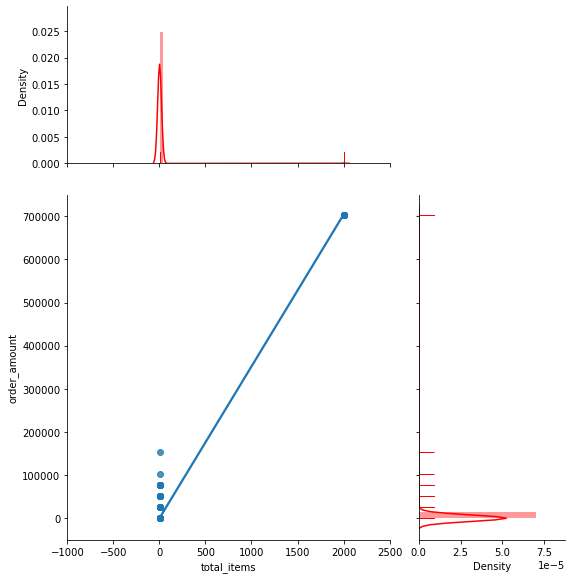

In [6]:
g = sns.JointGrid(xlim=(-1000, 2500), ylim=(-50000, 750000), ratio=2, height=8, marginal_ticks=True)
sns.regplot(df['total_items'], df['order_amount'], ax=g.ax_joint)
sns.distplot(df['total_items'], ax=g.ax_marg_x, color='red', rug=True, rug_kws={'height': 0.07})
sns.distplot(df['order_amount'], ax=g.ax_marg_y, color='red', vertical=True, rug=True, rug_kws={'height': 0.1});

The distributions are somewhat Gaussian except for two sets of points. First, orders that although small in volume, are very expensive. Second is the outcast blob with 2000(!!) items per order that cost around 700000 dollars!!  These orders can very well skew AOV. 


Since the two contributing factors to this skewness are large order volume and the expensive especiality items, it is worth checking out the box plots corresponding to these two. The expensive especiality items suggest creating a new column for the price of each unit item for each shop (we remember each shop sells only one type of sneakers).

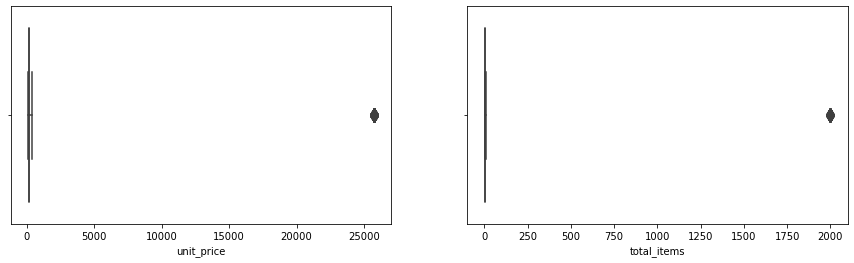

In [7]:
df['unit_price'] = df['order_amount'] / df['total_items']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
sns.boxplot(df['unit_price'], ax=axes[0], hue=df['total_items'], fliersize=10, whis=20)
sns.boxplot(df['total_items'], ax=axes[1], fliersize=10, whis=20);

Lets look at these orders individually. First the super expensive orders:

In [8]:
df[df['unit_price'] > 25000].sort_values(by='created_at')

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,unit_price
4311,4312,78,960,51450,2,debit,2017-03-01 3:02:10,25725.0
4040,4041,78,852,25725,1,cash,2017-03-02 14:31:12,25725.0
2821,2822,78,814,51450,2,cash,2017-03-02 17:13:25,25725.0
4412,4413,78,756,51450,2,debit,2017-03-02 4:13:39,25725.0
2492,2493,78,834,102900,4,debit,2017-03-04 4:37:34,25725.0
4715,4716,78,818,77175,3,debit,2017-03-05 5:10:44,25725.0
4420,4421,78,969,77175,3,debit,2017-03-09 15:21:35,25725.0
511,512,78,967,51450,2,cash,2017-03-09 7:23:14,25725.0
3780,3781,78,889,25725,1,cash,2017-03-11 21:14:50,25725.0
3167,3168,78,927,51450,2,cash,2017-03-12 12:23:08,25725.0


So apparently shop 78 is owned by Kanye West where he sews and signs the sneakers himself!! 25725 a piece!! these entries could definitely be considered outliers.


Secondly, lets look at the bulk orders:

In [9]:
df[df['total_items'] == 2000].sort_values(by=['created_at'])

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,unit_price
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00,352.0
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00,352.0
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00,352.0
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00,352.0
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00,352.0
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00,352.0


So there is not that many of them. Apparently these are all bulk orders made by the same user to the same shop with id 42 (Btw, such an amount purchased on a credit card!!! would love to know the financial institution). There are instances where the same order is made at the exact same time with a different order_id. Which is a bit weired. Not sure if these are legitimate orders or mistakes. In any case, these entries can be considered outliers too.

A better way to evaluate the same metric is to recalculated AOV and other metrics after removing the outliers from shop shop 42 and 78:

In [10]:
flierless_df = df[(df['total_items'] != 2000) & (df['shop_id'] != 78)]
flierless_df.describe()

,order_id,shop_id,user_id,order_amount,total_items,unit_price
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2499.551347,49.846465,849.752279,302.580514,1.994734,151.788536
std,1444.069407,29.061131,86.840313,160.804912,0.982821,29.034215
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1248.000000,24.000000,775.000000,163.000000,1.000000,132.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000,153.000000
75%,3751.000000,74.000000,925.000000,387.000000,3.000000,166.000000
max,5000.000000,100.000000,999.000000,1760.000000,8.000000,352.000000


The AOV of 302.580514 makes more sense now. There still could exists some pruchases that are distinctively more expensive like shown below. Shop 42 has its' massive orders removed but each pair still goes for 352 which is borderline outlier given the inner quartile range above. Similarly most orders cosist of 1 to 3 pairs, however, there are ones shipping 8 which could be another case of borderline outlier. However, I'd say an order of 8 pairs of a 300 dollars sneaker would not be outrages for a store that shops at these online stores.

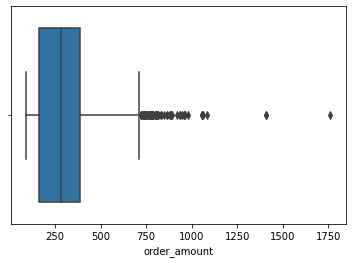

In [11]:
sns.boxplot(flierless_df['order_amount']);

Finally, it is worth noting that March of 2017 is not necassarily a big shopping period that would warrant inspecting certain dates more closely. And we have already removed the outstanding outliers.

## Part b)

A better metric which is relatively robust to a few extreme amounts in a data set is median. In this case the inital value of median was 284.

We can also look at AOV for shops 42, 78 and the rest separately:

In [12]:
def separator(x):
    if x == 42:
        return '42'
    elif x == 78:
        return '78'
    else:
        return 'Others'
    
df['shop_groups'] = df['shop_id'].apply(lambda x: separator(x))
df.groupby('shop_groups')['order_amount'].mean()

shop_groups
42        235101.490196
78         49213.043478
Others       300.155823
Name: order_amount, dtype: float64

Depending on what exactly we are looking for we can also calculate Average Order Price:

# $AOP = \frac{\Sigma\ order\_amount}{\Sigma\ total\_items} $

In [13]:
df['order_amount'].sum() / df['total_items'].sum()

357.92152221412965

# Question 2:
a)

In [ ]:
SELECT COUNT(*) FROM Orders
LEFT JOIN Shippers ON Orders.ShipperID = Shippers.ShipperID
WHERE ShipperName = 'Speedy Express';

52

b)

In [ ]:
SELECT 
  TOP 1 Orders.EmployeeID, Employees.LastName, COUNT(*) as OrderCounts
FROM 
  Orders LEFT JOIN Employees ON Employees.EmployeeID = Orders.EmployeeID
GROUP BY 
  Orders.EmployeeID, Employees.LastName
ORDER BY 
  COUNT(*) DESC

EmployeeID   LastName	     OrderCounts

    4     Peacock  40 

c)


- If the question is asking for maximum number of instances a product was ordered:

In [ ]:
SELECT 
    TOP 1 Products.ProductName, COUNT(*) as Instances
FROM 
    (((Orders INNER JOIN Customers ON Orders.CustomerID = Customers.CustomerID)
     INNER JOIN OrderDetails ON Orders.OrderID = OrderDetails.OrderID)
     INNER JOIN Products ON Products.ProductID = OrderDetails.ProductID)
WHERE
    Customers.Country = 'Germany'
GROUP BY 
    Products.ProductName
ORDER BY
    COUNT(*) DESC

ProductName-----------Instances

Gorgonzola_Telino--------5 

- If the question is asking for maximum total quantity of a product sold:

In [ ]:
SELECT 
    TOP 1 Products.ProductName, SUM(OrderDetails.Quantity) as Quantity
FROM 
    (((Orders INNER JOIN Customers ON Orders.CustomerID = Customers.CustomerID)
     INNER JOIN OrderDetails ON Orders.OrderID = OrderDetails.OrderID)
     INNER JOIN Products ON Products.ProductID = OrderDetails.ProductID)
WHERE
    Customers.Country = 'Germany'
GROUP BY 
    Products.ProductName
ORDER BY
    SUM(OrderDetails.Quantity) DESC

ProductName	------------  Quantity

Boston_Crab_Meat-----------160 